In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
df = pd.read_csv("E:/UVA\Thesis/cousera data/merge data.csv", encoding = "utf-8")
df.head(3)

C:\Users\10435\AppData\Local\Temp/ipykernel_25228/1752622741.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,reviews,ratings,votes,class,classnum
0,"Too many introductory lessons that aren't useful at all. Week 1&2&3 won't teach you anything. Too much talk and not enough useful information being said. I don't really care about the personal stories of Google employees, I'm here to learn something.",1,185,bad,-1
1,This was extremely basic and not much help. I do not see how this will contribute to finding a job.,1,67,bad,-1
2,"I liked the videos a lot, I just didn't get the point of the journal entries.",4,50,neutral,0


In [2]:
# Number of Words
count = df['reviews'].apply(lambda x: len(str(x).split(" ")))

type(count)

count.count()

14204

In [3]:
print (count)

0        41 
1        21 
2        17 
3        27 
4        39 
5        184
6        33 
7        36 
8        33 
9        31 
10       36 
11       36 
12       9  
13       126
14       32 
15       17 
16       34 
17       35 
18       29 
19       93 
20       35 
21       34 
22       32 
23       34 
24       22 
25       38 
26       74 
27       127
28       32 
29       14 
30       24 
31       30 
32       56 
33       41 
34       19 
35       30 
36       50 
37       82 
38       34 
39       35 
40       37 
41       30 
42       16 
43       62 
44       8  
45       37 
46       105
47       48 
48       109
49       52 
50       28 
51       17 
52       110
53       97 
54       101
55       54 
56       46 
57       44 
58       39 
59       40 
60       31 
61       32 
62       27 
63       23 
64       25 
65       20 
66       12 
67       8  
68       4  
69       5  
70       60 
71       51 
72       44 
73       5  
74       5  
75       2  
76       80 

In [4]:
count.mean()

18.18628555336525

In [5]:
df["count"] = df['reviews'].apply(lambda x: len(str(x).split(" ")))
df.groupby("ratings")["count"].mean()

ratings
1    43.257642
2    51.089494
3    31.901544
4    22.067815
5    15.672280
Name: count, dtype: float64

In [6]:
df.groupby("class")["count"].mean()

class
bad        47.399177
good       15.672280
neutral    24.211700
Name: count, dtype: float64

In [7]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

porter = PorterStemmer()

# Easy basic tokenization
def tokenizer(text):
    return word_tokenize(text)


# tokenization + stemming
def tokenizer_porter(text):
    return [porter.stem(word) for word in word_tokenize(text)]

In [9]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', str(text))
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

df['reviews'] = df['reviews'].apply(preprocessor)

In [10]:
def remove_single_char_func(text, threshold=1):
    threshold = threshold
    
    text = ' '.join([lambda x: " ".join(x.lower() for x in str(x).split()) > threshold])
    return text

In [11]:
df["tokenized"] = df["reviews"].apply(tokenizer)
df["tokenized"].head()

0    [too, many, introductory, lessons, that, aren, t, useful, at, all, week, 1, 2, 3, won, t, teach, you, anything, too, much, talk, and, not, enough, useful, information, being, said, i, don, t, really, care, about, the, personal, stories, of, google, employees, i, m, here, to, learn, something]
1    [this, was, extremely, basic, and, not, much, help, i, do, not, see, how, this, will, contribute, to, finding, a, job]                                                                                                                                                                               
2    [i, liked, the, videos, a, lot, i, just, didn, t, get, the, point, of, the, journal, entries]                                                                                                                                                                                                        
3    [overall, i, thought, it, was, a, great, introduction, to, the, topics, that, will, be, covered, i

In [12]:
df.head()

,reviews,ratings,votes,class,classnum,count,tokenized
0,too many introductory lessons that aren t useful at all week 1 2 3 won t teach you anything too much talk and not enough useful information being said i don t really care about the personal stories of google employees i m here to learn something,1,185,bad,-1,41,"[too, many, introductory, lessons, that, aren, t, useful, at, all, week, 1, 2, 3, won, t, teach, you, anything, too, much, talk, and, not, enough, useful, information, being, said, i, don, t, really, care, about, the, personal, stories, of, google, employees, i, m, here, to, learn, something]"
1,this was extremely basic and not much help i do not see how this will contribute to finding a job,1,67,bad,-1,21,"[this, was, extremely, basic, and, not, much, help, i, do, not, see, how, this, will, contribute, to, finding, a, job]"
2,i liked the videos a lot i just didn t get the point of the journal entries,4,50,neutral,0,17,"[i, liked, the, videos, a, lot, i, just, didn, t, get, the, point, of, the, journal, entries]"
3,overall i thought it was a great introduction to the topics that will be covered in the certificate a couple of areas for growth in my opinion,3,47,neutral,0,27,"[overall, i, thought, it, was, a, great, introduction, to, the, topics, that, will, be, covered, in, the, certificate, a, couple, of, areas, for, growth, in, my, opinion]"
4,this gives a great foundation for data analytics the instructors do skim over everything and i would have liked more detail but most of what i wanted to find out more about i was able to find online,5,33,good,1,39,"[this, gives, a, great, foundation, for, data, analytics, the, instructors, do, skim, over, everything, and, i, would, have, liked, more, detail, but, most, of, what, i, wanted, to, find, out, more, about, i, was, able, to, find, online]"


In [13]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\10435\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stop=nltk.corpus.stopwords.words('english')
stop[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [15]:
df['reviews'] = df['reviews'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))

In [16]:
df["reviews"].head()

0    many introductory lessons useful week 1 2 3 teach anything much talk enough useful information said really care personal stories google employees learn something
1    extremely basic much help see contribute finding job                                                                                                             
2    liked videos lot get point journal entries                                                                                                                       
3    overall thought great introduction topics covered certificate couple areas growth opinion                                                                        
4    gives great foundation data analytics instructors skim everything would liked detail wanted find able find online                                                
Name: reviews, dtype: object

In [17]:
df["tokenized"] = df["reviews"].apply(tokenizer)

In [18]:
df.head(3)

,reviews,ratings,votes,class,classnum,count,tokenized
0,many introductory lessons useful week 1 2 3 teach anything much talk enough useful information said really care personal stories google employees learn something,1,185,bad,-1,41,"[many, introductory, lessons, useful, week, 1, 2, 3, teach, anything, much, talk, enough, useful, information, said, really, care, personal, stories, google, employees, learn, something]"
1,extremely basic much help see contribute finding job,1,67,bad,-1,21,"[extremely, basic, much, help, see, contribute, finding, job]"
2,liked videos lot get point journal entries,4,50,neutral,0,17,"[liked, videos, lot, get, point, journal, entries]"


In [19]:
class_frequency=df.explode('tokenized').groupby('ratings')['tokenized'].value_counts()

In [20]:
class_frequency

ratings  tokenized                     
1        course                            185 
         data                              76  
         time                              63  
         google                            54  
         certificate                       53  
         sql                               39  
         basic                             36  
         get                               35  
         like                              35  
         one                               31  
         courses                           30  
         could                             28  
         questions                         26  
         analysis                          25  
         much                              24  
         analytics                         23  
         skills                            23  
         waste                             23  
         way                               23  
         job                               22  


In [25]:
dftokenized = df["reviews"].apply(tokenizer)

In [26]:
merge =sum(dftokenized,[])

In [27]:
nlp_words=nltk.FreqDist(merge)

In [28]:
nlp_words.most_common()

[('course', 8216),
 ('data', 4535),
 ('great', 2943),
 ('good', 2259),
 ('really', 1355),
 ('analytics', 1178),
 ('google', 1098),
 ('analysis', 1033),
 ('lot', 991),
 ('learn', 971),
 ('well', 945),
 ('learning', 936),
 ('excellent', 896),
 ('thank', 837),
 ('easy', 808),
 ('like', 790),
 ('understand', 786),
 ('sql', 755),
 ('analyst', 729),
 ('instructor', 729),
 ('amazing', 699),
 ('much', 674),
 ('way', 649),
 ('best', 647),
 ('learned', 644),
 ('content', 607),
 ('thanks', 580),
 ('would', 570),
 ('new', 568),
 ('introduction', 566),
 ('experience', 566),
 ('one', 562),
 ('skills', 556),
 ('also', 555),
 ('knowledge', 546),
 ('courses', 534),
 ('information', 533),
 ('enjoyed', 514),
 ('awesome', 494),
 ('helpful', 490),
 ('basic', 479),
 ('get', 453),
 ('informative', 449),
 ('nice', 444),
 ('time', 428),
 ('start', 428),
 ('useful', 420),
 ('coursera', 417),
 ('questions', 409),
 ('work', 407),
 ('things', 399),
 ('interesting', 397),
 ('videos', 387),
 ('job', 380),
 ('think',

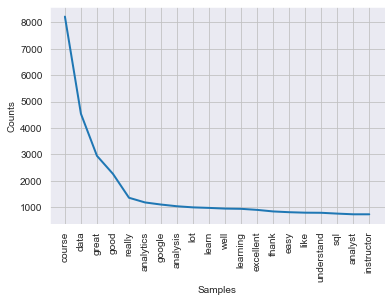

C:\Users\10435\AppData\Local\Temp/ipykernel_31116/3808590412.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 432x288 with 0 Axes>

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
nlp_words=nltk.FreqDist(merge)
nlp_words.plot(20)
fig = plt.gcf()
fig.savefig("E:/UVA\Thesis/cousera data/p.png", dpi=600, bbox_inches = 'tight')
fig.show()

In [22]:
df["reviews"] = df["reviews"].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
df["reviews"].head()

0    many introductory lessons useful week 1 2 3 teach anything much talk enough useful information said really care personal stories google employees learn something
1    extremely basic much help see contribute finding job                                                                                                             
2    liked videos lot get point journal entries                                                                                                                       
3    overall thought great introduction topics covered certificate couple areas growth opinion                                                                        
4    gives great foundation data analytics instructors skim everything would liked detail wanted find able find online                                                
Name: reviews, dtype: object

In [23]:
# removal stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df["reviews"] = df["reviews"].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
df["reviews"].head()

0    many introductory lessons useful week 1 2 3 teach anything much talk enough useful information said really care personal stories google employees learn something
1    extremely basic much help see contribute finding job                                                                                                             
2    liked videos lot get point journal entries                                                                                                                       
3    overall thought great introduction topics covered certificate couple areas growth opinion                                                                        
4    gives great foundation data analytics instructors skim everything would liked detail wanted find able find online                                                
Name: reviews, dtype: object

In [24]:
df.head(3)

,reviews,ratings,votes,class,classnum,count,tokenized,tokenizer_porter
0,many introductory lessons useful week 1 2 3 teach anything much talk enough useful information said really care personal stories google employees learn something,1,185,bad,-1,41,"[many, introductory, lessons, useful, week, 1, 2, 3, teach, anything, much, talk, enough, useful, information, said, really, care, personal, stories, google, employees, learn, something]","[mani, introductori, lesson, use, week, 1, 2, 3, teach, anyth, much, talk, enough, use, inform, said, realli, care, person, stori, googl, employe, learn, someth]"
1,extremely basic much help see contribute finding job,1,67,bad,-1,21,"[extremely, basic, much, help, see, contribute, finding, job]","[extrem, basic, much, help, see, contribut, find, job]"
2,liked videos lot get point journal entries,4,50,neutral,0,17,"[liked, videos, lot, get, point, journal, entries]","[like, video, lot, get, point, journal, entri]"


In [29]:
freq = pd.Series(' '.join(df["reviews"]).split()).value_counts()[:15]
freq1 = list(freq.index)
df["reviews"] = df["reviews"].apply(lambda x: " ".join(x for x in x.split() if x not in freq1))

In [30]:
rare = pd.Series(' '.join(df["reviews"]).split()).value_counts()[-1000:]
rare1 = list(rare.index)
df["reviews"] = df["reviews"].apply(lambda x: " ".join(x for x in x.split() if x not in rare1))

In [31]:
minReviewLen = 15

DF = df[df["reviews"].str.len() > minReviewLen]
MIN = df[df["reviews"].str.len() <= minReviewLen]

In [32]:
DF.shape

(9886, 6)

In [33]:
MIN[0:20]

,reviews,ratings,votes,class,classnum,tokenized
67,key ascpects,5,1,good,1,"[great, learn, key, ascpects]"
68,starters,5,1,good,1,"[good, course, for, starters]"
73,content basic,3,1,neutral,0,"[course, content, basic]"
74,introduction,3,1,neutral,0,[introduction]
75,basic,3,1,neutral,0,"[too, basic]"
176,hi,5,0,good,1,[hi]
299,,5,0,good,1,[]
301,,5,0,good,1,"[this, course, excellent]"
308,regret,5,0,good,1,"[i, regret, it]"
423,foundation,5,0,good,1,"[this, foundation, course]"


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=True,
                        preprocessor=None,
                       ngram_range = (2,2),
                       )

0    [many, introductory, lessons, useful, week, 1, 2, 3, teach, anything, much, talk, enough, useful, information, said, really, care, personal, stories, google, employees, learn, something]
1    [extremely, basic, much, help, see, contribute, finding, job]                                                                                                                             
2    [liked, videos, lot, get, point, journal, entries]                                                                                                                                        
3    [overall, thought, great, introduction, topics, covered, certificate, couple, areas, growth, opinion]                                                                                     
4    [gives, great, foundation, data, analytics, instructors, skim, everything, would, liked, detail, wanted, find, able, find, online]                                                        
Name: reviews, dtype: object

In [21]:
df["tokenizer_porter"] = df["reviews"].apply(tokenizer_porter)

In [22]:
df.head()

,reviews,ratings,votes,class,classnum,count,tokenized,tokenizer_porter
0,many introductory lessons useful week 1 2 3 teach anything much talk enough useful information said really care personal stories google employees learn something,1,185,bad,-1,41,"[many, introductory, lessons, useful, week, 1, 2, 3, teach, anything, much, talk, enough, useful, information, said, really, care, personal, stories, google, employees, learn, something]","[mani, introductori, lesson, use, week, 1, 2, 3, teach, anyth, much, talk, enough, use, inform, said, realli, care, person, stori, googl, employe, learn, someth]"
1,extremely basic much help see contribute finding job,1,67,bad,-1,21,"[extremely, basic, much, help, see, contribute, finding, job]","[extrem, basic, much, help, see, contribut, find, job]"
2,liked videos lot get point journal entries,4,50,neutral,0,17,"[liked, videos, lot, get, point, journal, entries]","[like, video, lot, get, point, journal, entri]"
3,overall thought great introduction topics covered certificate couple areas growth opinion,3,47,neutral,0,27,"[overall, thought, great, introduction, topics, covered, certificate, couple, areas, growth, opinion]","[overal, thought, great, introduct, topic, cover, certif, coupl, area, growth, opinion]"
4,gives great foundation data analytics instructors skim everything would liked detail wanted find able find online,5,33,good,1,39,"[gives, great, foundation, data, analytics, instructors, skim, everything, would, liked, detail, wanted, find, able, find, online]","[give, great, foundat, data, analyt, instructor, skim, everyth, would, like, detail, want, find, abl, find, onlin]"


In [69]:
import math
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words="english")
bag = count.fit_transform(DF["reviews"])


In [70]:
def show_vocabulary(vectorizer):
    words = count.get_feature_names()

    print(f'Vocabulary size: {len(words)} words')

    # we can print ~10 words per line
    for l in np.array_split(words, math.ceil(len(words) / 10)):
        print(''.join([f'{x:<15}' for x in l]))

In [71]:
from termcolor import colored

def show_bow(vectorizer, bow):
    words = count.get_feature_names()

    # we can print ~8 words + coefs per line
    for l in np.array_split(list(zip(words, bow)), math.ceil(len(words) / 8)):
        print(' | '.join([colored(f'{w:<15}:{n:>2}', 'grey') if int(n) == 0 else colored(f'{w:<15}:{n:>2}', on_color='on_yellow', attrs=['bold']) for w, n in l ]))

def show_bow_float(vectorizer, bow):
    words = count.get_feature_names()

    # we can print ~6 words + coefs per line
    for l in np.array_split(list(zip(words, bow)), math.ceil(len(words) / 6)):
        print(' | '.join([colored(f'{w:<15}:{float(n):>0.2f}', 'grey') if float(n) == 0 else colored(f'{w:<15}:{float(n):>0.2f}', on_color='on_yellow', attrs=['bold']) for w, n in l ]))

In [72]:
show_vocabulary(bag)

Vocabulary size: 7999 words
000            04             04000          0program       10             100            101            12             1200           13             
14             15             16             18             19             1st            20             200            20000          2014           
24             25             2nd            2x             30             35             360            37             3d             3rd            
40             45             4gb            4th            50             5th            5week          60             67k            6steps         
6th            70             75             75x            80             85             90             95             99             _do            
abarca         abasc          abbreviated    abc            abig           abilities      ability        abit           able           abohut         
aborda         abordar        aboundant      abre           absolu

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [235]:
s = df["reviews"][0]

print(f'Text: "{s}"')
bow = count.transform([s])
print(f'BoW Shape: {bow.shape}')
bow = bow.toarray()   # From sparse matrix to dense matrix (Careful with MEMORY)
print(f'BoW Vector: {bow}')

Text: "many introductory lessons useful week 1 2 3 teach anything much talk enough useful information said really care personal stories google employees learn something"
BoW Shape: (1, 9169)
BoW Vector: [[0 0 0 ... 0 0 0]]


In [236]:
show_bow(count, bow[0])

000            : 0 | 04             : 0 | 04000          : 0 | 0program       : 0 | 10             : 0 | 100            : 0 | 101            : 0 | 12             : 0
1200           : 0 | 13             : 0 | 14             : 0 | 15             : 0 | 16             : 0 | 18             : 0 | 19             : 0 | 1st            : 0
20             : 0 | 200            : 0 | 20000          : 0 | 2014           : 0 | 24             : 0 | 25             : 0 | 2cnd           : 0 | 2k             : 0
2nd            : 0 | 2x             : 0 | 30             : 0 | 35             : 0 | 360            : 0 | 37             : 0 | 3d             : 0 | 3rd            : 0
40             : 0 | 45             : 0 | 4gb            : 0 | 4th            : 0 | 50             : 0 | 5th            : 0 | 5week          : 0 | 60             : 0
67k            : 0 | 6steps         : 0 | 6th            : 0 | 70             : 0 | 75             : 0 | 75x            : 0 | 80             : 0 | 85             : 0
8ce 

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(DF['reviews'])

In [59]:
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [60]:
weights = np.asarray(x.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': v.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
7538,understand,0.018502
3861,instructor,0.016732
309,amazing,0.016650
3978,introduction,0.015276
366,analyst,0.015023
4243,learned,0.014667
1533,content,0.014028
7194,thanks,0.013940
808,best,0.013906
3776,informative,0.013882


In [61]:
v1 = TfidfVectorizer(ngram_range = (2,2))
x1 = v1.fit_transform(df['reviews'])

In [62]:
weights1 = np.asarray(x1.mean(axis=0)).ravel().tolist()
weights1_df = pd.DataFrame({'term': v1.get_feature_names(), 'weight': weights1})
weights1_df.sort_values(by='weight', ascending=False).head(20)

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
35645,looking forward,0.002386
40741,one best,0.002175
58731,thanks coursera,0.001764
31357,introduction world,0.001715
39914,new things,0.001588
33598,learned much,0.001447
6024,best ever,0.001417
18850,excelente curso,0.001373
27209,highly recommended,0.001372
2086,amazing experience,0.001245


In [43]:
v2 = TfidfVectorizer(ngram_range = (1,2))
x2 = v2.fit_transform(DF['reviews'])
weights2 = np.asarray(x2.mean(axis=0)).ravel().tolist()
weights2_df = pd.DataFrame({'term': v2.get_feature_names(), 'weight': weights2})
weights2_df.sort_values(by='weight', ascending=False).head(20)

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
69233,understand,0.010344
33545,instructor,0.009489
2332,amazing,0.009445
34921,introduction,0.008848
2762,analyst,0.008450
37521,learned,0.008173
22013,experience,0.007993
32669,informative,0.007987
12590,content,0.007933
6745,best,0.007839


In [44]:
v3 = TfidfVectorizer(ngram_range = (1,3))
x3 = v3.fit_transform(DF['reviews'])
weights3 = np.asarray(x3.mean(axis=0)).ravel().tolist()
weights3_df = pd.DataFrame({'term': v3.get_feature_names(), 'weight': weights3})
weights3_df.sort_values(by='weight', ascending=False).head(20)

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
141734,understand,0.008499
68549,instructor,0.007858
4666,amazing,0.007841
71471,introduction,0.007533
66856,informative,0.006968
44712,experience,0.006801
5638,analyst,0.006659
76860,learned,0.006503
25636,content,0.006484
134158,thanks,0.006380


In [50]:
v4 = TfidfVectorizer(ngram_range = (3,3))
x4 = v4.fit_transform(DF['reviews'])
weights4 = np.asarray(x4.mean(axis=0)).ravel().tolist()
weights4_df = pd.DataFrame({'term': v4.get_feature_names(), 'weight': weights4})
weights4_df.sort_values(by='weight', ascending=False).head(20)

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
42166,looking forward next,0.001074
48358,one best courses,0.001046
19701,enjoyed every bit,0.000618
43251,make driven decisions,0.000601
39608,learned new things,0.000601
57132,real life examples,0.000589
18818,efforts deep heart,0.000572
4120,appreciate efforts deep,0.000572
4702,asking right questions,0.000527
64182,start career analyst,0.000502


In [48]:
occ = np.asarray(bag.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': count.get_feature_names(), 'occurrences': occ})
counts_df.sort_values(by='occurrences', ascending=False).head(20)

,term,occurrences
4232,like,771
7397,understand,768
6642,sql,739
354,analyst,720
3788,instructor,694
7715,way,629
4166,learned,590
1500,content,565
4756,new,555
300,amazing,552
